In [1]:
from ipywidgets import IntProgress
from IPython.display import display
import time

from inst.cadria import wnd

w = wnd()
w.load()

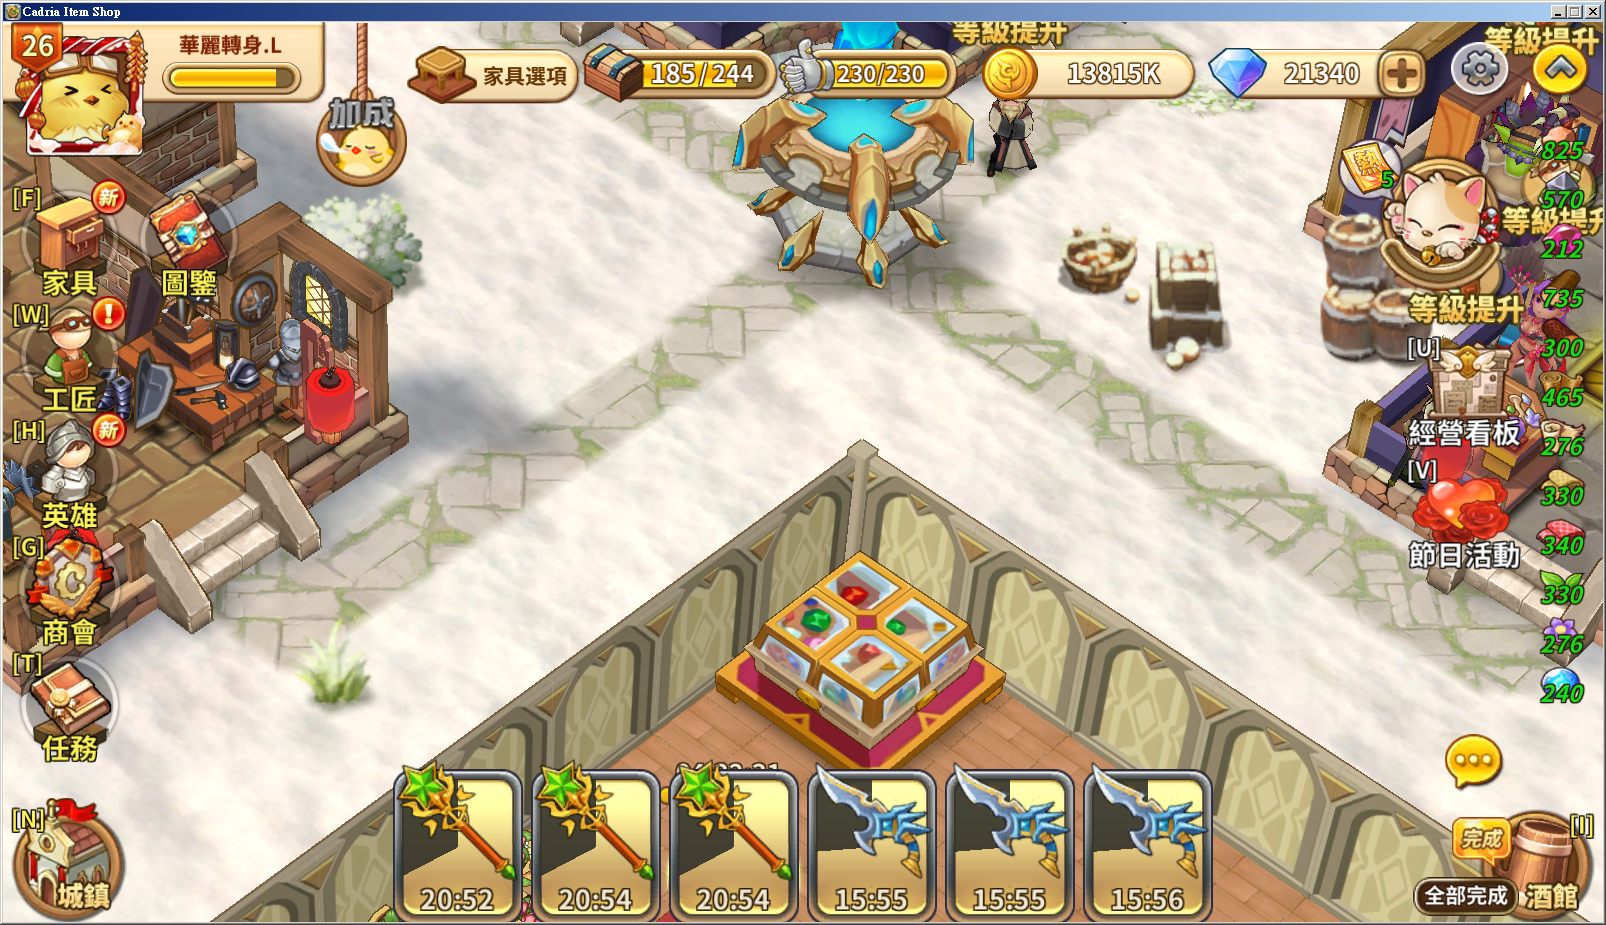

In [2]:
w.grab()
w.image

# 戰爭-籌備

In [3]:
def produce(n=5, t=60, itemAvailabes=[True for x in list(range(6))]):
    itemAvailabes += [False for x in list(range(6 - len(itemAvailabes)))]
    
    p = IntProgress()
    p.max = t
    p.description = 'INIT'
    display(p)
    
    for _ in range(n):
        # 製作
        w.focus()
        for seq in range(6):
            if itemAvailabes[seq]:
                w.warProduce()
                time.sleep(1)

        # 等待全部完成
        for j in range(p.max):
            time.sleep(1)
            p.value = j + 1
            p.description = str(p.max - j) + ' s'
        p.description = 'DONE'

        # 收成
        w.focus()
        for seq in range(6):
            if itemAvailabes[seq]:
                w.warHarvest(seq)
                time.sleep(1)


# 戰爭-戰鬥

In [4]:
def fight(n=1):    
    from inst.cadria import WarFightMode
    
    warmode = WarFightMode.HARD
    
    # 戰爭等待時間(sec)
    t = (10 + 10*warmode) * 60
    
    p = IntProgress()
    p.max = t
    p.description = 'INIT'
    display(p)
    
    # 可用隊伍，依序執行(如果有中斷過則順序要調整)
    teams = ['1', '2']
    
    for i in range(n):
        teamNo = teams[i % len(teams)]
        w.focus()
        w.warFight(teamNo, warmode)
    
        for j in range(p.max):
            time.sleep(1)
            p.value = j + 1
            p.description = str(p.max - j) + ' s'
        p.description = 'DONE'
    
        w.focus()
        w.warFightCompleted()
        time.sleep(1)
    

# 執行

In [5]:
class warstepType:
    NONE = 0
    PRODUCE = 1
    FIGHT = 2

warstep = warstepType.NONE
if warstep == warstepType.PRODUCE:
    produce(t=60)
elif warstep == warstepType.FIGHT:
    fight(8)
else:
    print('not work:', warstep)
    

not work: 0
